# 03-1 k-최근접 이웃 회귀

지도 학습 알고리즘은 분류와 회귀로 나뉨

- 분류 : 샘플을 몇 개의 클래스 중 하나로 분류

- 회귀 : 임의의 어떤 숫자를 예측

데이터 준비

In [2]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

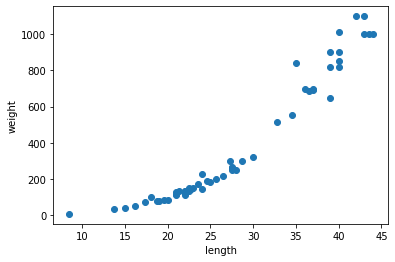

In [4]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

훈련 세트 준비

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# reshape(행, 열) : 넘파이 배열의 크기를 바꿀 때 사용
# -1은 나머지 차원이 결정되고 남은 것을 모두 할당
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [13]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


회귀 모델 훈련

결정계수 기준 평가

`결정계수 = 1 - { Σ (타킷-예측)^2 / Σ (타깃-평균)^2 }`

In [6]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

knr.score(test_input, test_target)

0.992809406101064

mean_absolute_error() 이용 : 타깃과 예측의 절댓값 오차를 평균하여 반환

In [7]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측 생성
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


과대적합 vs 과소적합

In [8]:
knr.score(train_input, train_target)

0.9698823289099254

In [9]:
knr.score(test_input, test_target)

0.992809406101064

**과대적합** : 훈련 세트의 점수가 테스트 세트의 점수보다 높은 경우. 새로운 샘플에 대한 예측을 만들 때 잘 동작하지 않음.

**과소적합** : 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수 모두 낮은 경우. 모델이 단순하여 훈련 세트에 적절히 훈련되지 않음.

k-최근접 이웃 회귀에서 이웃의 개수를 늘리면 과소적합이 되고, 줄이면 과대적합이 됨

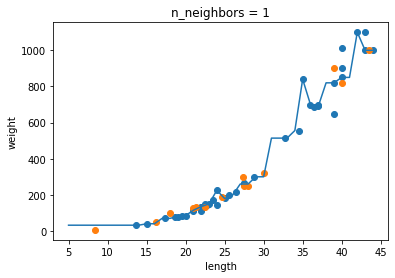

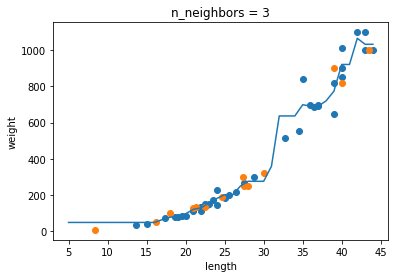

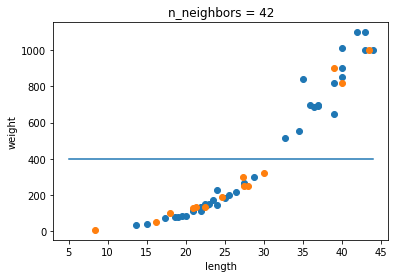

In [15]:
x = np.arange(5, 45).reshape(-1, 1) # 5부터 45까지 x 좌표 만들기

for n in [1, 3, 42]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x) # 지정한 범위의 x에 대한 예측 구하기

  plt.scatter(train_input, train_target)
  plt.scatter(test_input, test_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

In [10]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [11]:
knr.score(train_input, train_target)

0.9804899950518966

In [12]:
knr.score(test_input, test_target)

0.9746459963987609

확인문제 : k값을 1, 5, 10으로 바꿔가며 훈련한 뒤 농어의 길이를 5부터 45까지 예측하여 그래프 생성

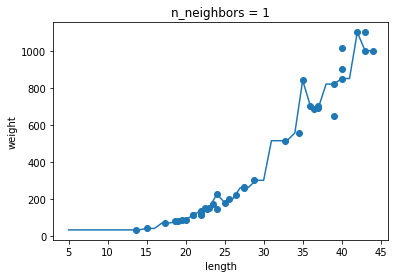

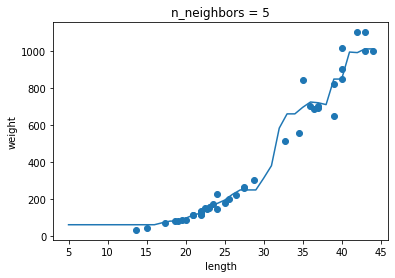

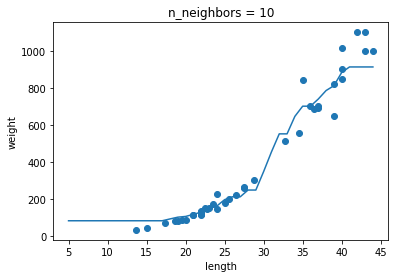

In [14]:
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1) # 5부터 45까지 x 좌표 만들기

for n in [1, 5, 10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x) # 지정한 범위의 x에 대한 예측 구하기

  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()